<a href="https://colab.research.google.com/github/ANAGHA-SREYAS/project/blob/main/PROJECT_Air_Quality_and_Health_Impact_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Air Quality and Health Impact Dataset Analysis**

NAME: ANAGHA VP

ORGANISATION: Entri-Elevate

DATE: 16/08/2024

# **Overview of problem statement**

This project involves analyzing and predicting the impact of air quality on public health using a comprehensive dataset comprising 5,811 records. The dataset captures a range of variables related to air quality, pollutants, and weather conditions, and includes corresponding health impact metrics. The primary objective is to understand the relationship between various air quality indicators and public health outcomes, and to develop predictive models that categorize the health impact based on these indicators.

# **Objective**
Develop and evaluate machine learning models to predict health impact classes based on air quality metrics, pollutants, and weather conditions.

# **Data Description**
* **source**-https://www.kaggle.com/datasets/rabieelkharoua/air-quality-and-health-impact-dataset/data

* **features-**

RecordID: A unique identifier assigned to each record .

**Air Quality Metrics**

AQI: Air Quality Index, a measure of how polluted the air currently is or how polluted it is forecast to become.

PM10: Concentration of particulate matter less than 10 micrometers in diameter (μg/m³).

PM2_5: Concentration of particulate matter less than 2.5 micrometers in diameter (μg/m³).

NO2: Concentration of nitrogen dioxide (ppb).

SO2: Concentration of sulfur dioxide (ppb).

O3: Concentration of ozone (ppb).

**Weather Conditions**

Temperature: Temperature in degrees Celsius (°C).

Humidity: Humidity percentage (%).

WindSpeed: Wind speed in meters per second (m/s).

**Health Impact Metrics**

RespiratoryCases: Number of respiratory cases reported.

CardiovascularCases: Number of cardiovascular cases reported.

HospitalAdmissions: Number of hospital admissions reported.


# **import  necessary libraries**

imports Pandas, Numpy, Matplotlib, and Seaborn to efficiently manipulate and analyze  dataset, and to create insightful visualizations that reveal underlying patterns and trends.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# **Data collection**

loads dataset into a Pandas DataFrame and  checks the first few rows using the head() method to get an initial idea of the data's structure and content.

In [ ]:
data=pd.read_csv('/content/air_quality_health_impact_data.csv')
data.head()

,RecordID,AQI,PM10,PM2_5,NO2,SO2,O3,Temperature,Humidity,WindSpeed,RespiratoryCases,CardiovascularCases,HospitalAdmissions,HealthImpactScore,HealthImpactClass
0,1,187.270059,295.853039,13.038560,6.639263,66.161150,54.624280,5.150335,84.424344,6.137755,7,5,1,97.244041,0.0
1,2,475.357153,246.254703,9.984497,16.318326,90.499523,169.621728,1.543378,46.851415,4.521422,10,2,0,100.000000,0.0
2,3,365.996971,84.443191,23.111340,96.317811,17.875850,9.006794,1.169483,17.806977,11.157384,13,3,0,100.000000,0.0
3,4,299.329242,21.020609,14.273403,81.234403,48.323616,93.161033,21.925276,99.473373,15.302500,8,8,1,100.000000,0.0
4,5,78.009320,16.987667,152.111623,121.235461,90.866167,241.795138,9.217517,24.906837,14.534733,9,0,1,95.182643,0.0


# **Understanding the dataset**

In [ ]:
#shape of the dataset
data.shape

(5811, 15)

the given data set contains 15 columns and 5811 rows

In [ ]:
#columns of the data set
print('The columns of the dataset are :\n',data.columns)

The columns of the dataset are :
 Index(['RecordID', 'AQI', 'PM10', 'PM2_5', 'NO2', 'SO2', 'O3', 'Temperature',
       'Humidity', 'WindSpeed', 'RespiratoryCases', 'CardiovascularCases',
       'HospitalAdmissions', 'HealthImpactScore', 'HealthImpactClass'],
      dtype='object')


 To gain a comprehensive overview of dataset, including the number of entries, data types of each column, and the presence of any missing values, helping to understand the overall structure and quality of the data.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5811 entries, 0 to 5810
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   RecordID             5811 non-null   int64  
 1   AQI                  5811 non-null   float64
 2   PM10                 5811 non-null   float64
 3   PM2_5                5811 non-null   float64
 4   NO2                  5811 non-null   float64
 5   SO2                  5811 non-null   float64
 6   O3                   5811 non-null   float64
 7   Temperature          5811 non-null   float64
 8   Humidity             5811 non-null   float64
 9   WindSpeed            5811 non-null   float64
 10  RespiratoryCases     5811 non-null   int64  
 11  CardiovascularCases  5811 non-null   int64  
 12  HospitalAdmissions   5811 non-null   int64  
 13  HealthImpactScore    5811 non-null   float64
 14  HealthImpactClass    5811 non-null   float64
dtypes: float64(11), int64(4)
memory usage:

To generate descriptive statistics for dataset, summarizing key metrics such as mean, median, standard deviation, and percentiles for each numerical column.

In [ ]:
#descriptive statistics
data.describe()

,RecordID,AQI,PM10,PM2_5,NO2,SO2,O3,Temperature,Humidity,WindSpeed,RespiratoryCases,CardiovascularCases,HospitalAdmissions,HealthImpactScore,HealthImpactClass
count,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000
mean,2906.000000,248.438476,148.654997,100.223714,102.293445,49.456838,149.312431,14.975500,54.776853,9.989177,9.974187,4.988986,2.001033,93.785223,0.281191
std,1677.635538,144.777638,85.698500,58.096612,57.713175,28.530329,86.534240,14.483067,26.020786,5.776950,3.129234,2.216791,1.398794,13.318904,0.714075
min,1.000000,0.005817,0.015848,0.031549,0.009625,0.011023,0.001661,-9.990998,10.001506,0.002094,1.000000,0.000000,0.000000,22.448488,0.000000
25%,1453.500000,122.951293,75.374954,49.435171,53.538538,24.887264,73.999665,2.481500,31.995262,4.952343,8.000000,3.000000,1.000000,98.203057,0.000000
50%,2906.000000,249.127841,147.634997,100.506337,102.987736,49.530165,149.559871,14.942428,54.543904,10.051742,10.000000,5.000000,2.000000,100.000000,0.000000
75%,4358.500000,373.630668,222.436759,151.340260,151.658516,73.346617,223.380126,27.465374,77.641639,14.971840,12.000000,6.000000,3.000000,100.000000,0.000000
max,5811.000000,499.858837,299.901962,199.984965,199.980195,99.969561,299.936812,39.963434,99.997493,19.999139,23.000000,14.000000,12.000000,100.000000,4.000000


# **data preprocessing-data cleaning**

**handling missing values**

checks for any missing values in the dataset ..prints out the total number of missing entries for each column.

In [ ]:
#checking for missing values
print(data.isnull().sum())

RecordID               0
AQI                    0
PM10                   0
PM2_5                  0
NO2                    0
SO2                    0
O3                     0
Temperature            0
Humidity               0
WindSpeed              0
RespiratoryCases       0
CardiovascularCases    0
HospitalAdmissions     0
HealthImpactScore      0
HealthImpactClass      0
dtype: int64


The dataset does not contain any null values

**Handling imbalance dataset**

To assess whether there is an imbalance in the target variable, creates a visualization of the distribution of the HealthImpactClass using Seaborn's countplot.

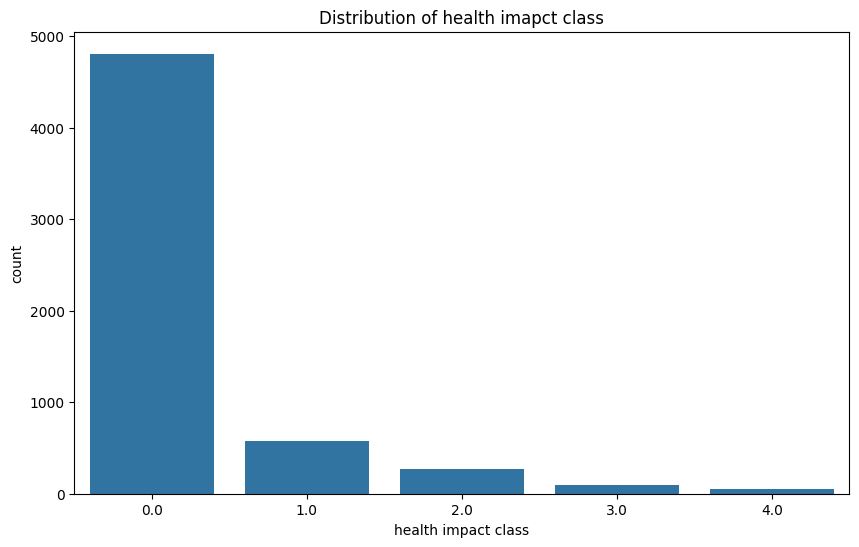

In [ ]:
#distribution of target variable
plt.figure(figsize=(10,6))
sns.countplot(x='HealthImpactClass',data=data)
plt.title('Distribution of health imapct class')
plt.xlabel('health impact class')
plt.ylabel('count')
plt.show()

In [ ]:
print(data['HealthImpactClass'].value_counts())

HealthImpactClass
0.0    4808
1.0     579
2.0     273
3.0      95
4.0      56
Name: count, dtype: int64


The target variable HealthImpactClass exhibits significant class imbalance, with the majority class (0.0) comprising 4808 instances, which is overwhelmingly larger than the other classes. The minority classes (1.0, 2.0, 3.0, and 4.0) have 579, 273, 95, and 56 instances, respectively.

To address the class imbalance in the dataset, employs the SMOTE (Synthetic Minority Over-sampling Technique) from the imblearn library. SMOTE generates synthetic samples for the minority classes, thereby balancing the dataset.

In [ ]:
#Handling imbalance by over sampling technique

from imblearn.over_sampling import SMOTE
x=data.drop('HealthImpactClass',axis=1)
y=data['HealthImpactClass']
smote = SMOTE(random_state=42)


x_resampled, y_resampled = smote.fit_resample(x,y)
data_resampled=pd.concat([x_resampled,y_resampled],axis=1)

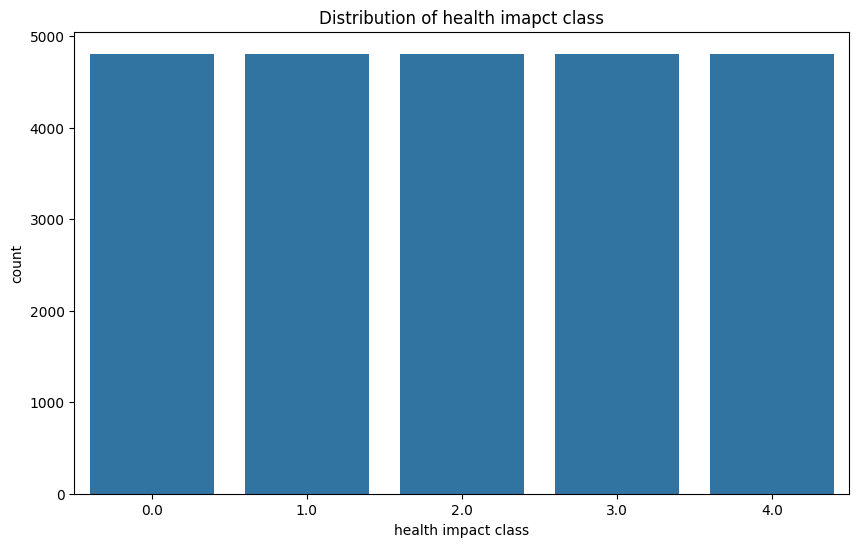

In [ ]:
#checking for imbalance after oversampling
plt.figure(figsize=(10,6))
sns.countplot(x='HealthImpactClass',data=data_resampled)
plt.title('Distribution of health imapct class')
plt.xlabel('health impact class')
plt.ylabel('count')
plt.show()

In [ ]:
#shape of the data after resamlping
data_resampled.shape

(24040, 15)

In [ ]:
data_resampled.describe()

,RecordID,AQI,PM10,PM2_5,NO2,SO2,O3,Temperature,Humidity,WindSpeed,RespiratoryCases,CardiovascularCases,HospitalAdmissions,HealthImpactScore,HealthImpactClass
count,24040.000000,24040.000000,24040.000000,24040.000000,24040.000000,24040.000000,24040.000000,24040.000000,24040.000000,24040.000000,24040.000000,24040.000000,24040.000000,24040.000000,24040.000000
mean,3867.944343,170.357511,133.936525,85.505500,93.071604,49.749366,131.177122,14.801383,54.664516,10.028954,9.617512,4.669218,1.691348,79.465474,2.000000
std,1899.050773,150.716425,81.513198,52.706076,50.952363,24.228975,76.825322,12.676556,22.138697,5.058016,2.734322,1.904208,1.196592,22.644090,1.414243
min,1.000000,0.005817,0.015848,0.031549,0.009625,0.011023,0.001661,-9.990998,10.001506,0.002094,1.000000,0.000000,0.000000,22.448488,0.000000
25%,2272.000000,40.201397,61.474278,39.863715,50.903699,30.803354,66.983214,4.492774,37.124671,5.977366,8.000000,3.000000,1.000000,61.736156,1.000000
50%,4395.000000,109.355922,127.291214,79.868155,91.671283,50.318637,121.796362,14.449234,54.362880,10.113229,9.000000,5.000000,2.000000,86.820483,2.000000
75%,5626.000000,309.745820,201.929119,129.013635,134.589348,68.540113,191.816513,25.061146,72.090927,14.090403,11.000000,6.000000,2.000000,100.000000,3.000000
max,5811.000000,499.858837,299.901962,199.984965,199.980195,99.969561,299.936812,39.963434,99.997493,19.999139,23.000000,14.000000,12.000000,100.000000,4.000000


 **Handling outliers**

detect outliers in dataset using three common methods: Boxplot, Interquartile Range (IQR), and Z-Score. Each method provides a different way to identify data points that deviate significantly from the majority of the data.

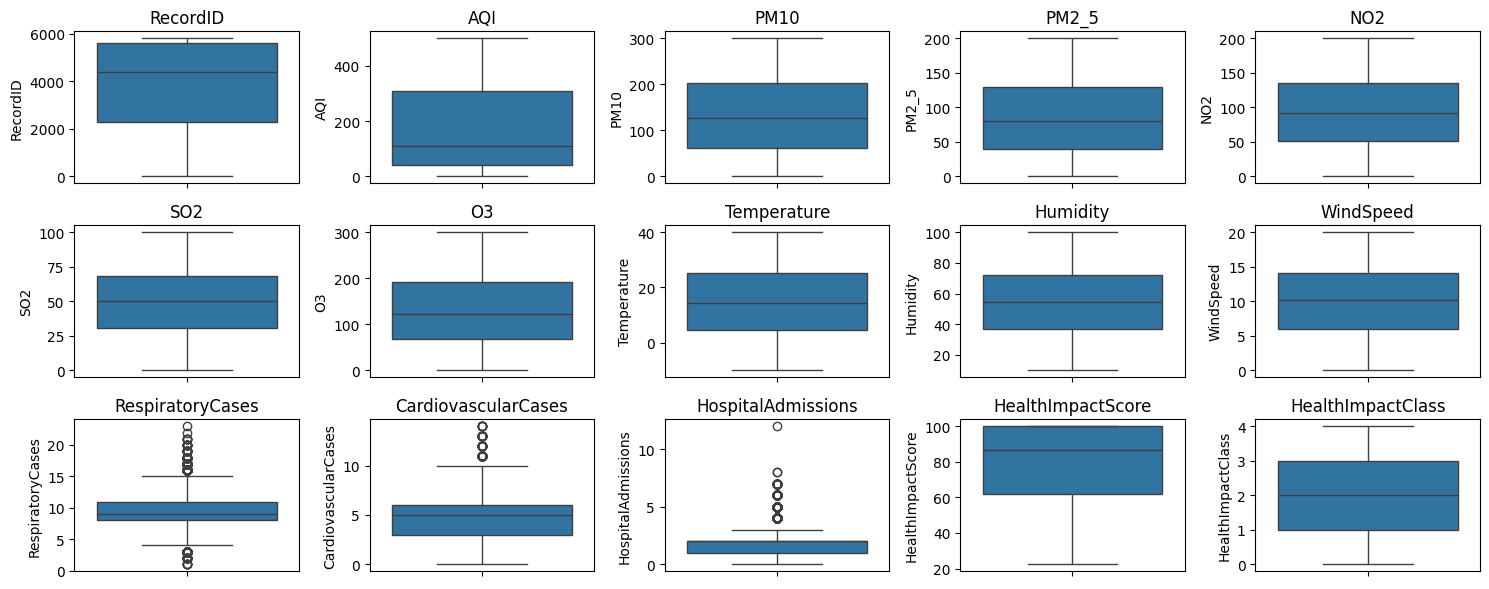

In [ ]:
#outlier detection by box plots

fig,axes=plt.subplots(nrows=3,ncols=5,figsize=(15,6))
axes=axes.flatten()

for i,column in enumerate(data_resampled.columns):
  sns.boxplot(y=data_resampled[column],ax=axes[i])
  axes[i].set_title(column)

plt.tight_layout()
plt.show()

In [ ]:
#detect  outlier using IQR
def iqr_outlier(df):
  Q1=df.quantile(0.25)
  Q3=df.quantile(0.75)
  IQR=Q3-Q1
  upper_bound= Q3+ 1.5*IQR
  lower_bound= Q1 -1.5*IQR
  outliers=(df<lower_bound)|(df>upper_bound)
  total_outliers=outliers.sum()
  return total_outliers

total_outliers=iqr_outlier(data_resampled)
print('columns contain outliers\n',total_outliers)
print('************************************')
print('The total number of outliers are:',total_outliers.sum())


columns contain outliers
 RecordID                  0
AQI                       0
PM10                      0
PM2_5                     0
NO2                       0
SO2                       0
O3                        0
Temperature               0
Humidity                  0
WindSpeed                 0
RespiratoryCases        826
CardiovascularCases     131
HospitalAdmissions     1627
HealthImpactScore         0
HealthImpactClass         0
dtype: int64
************************************
The total number of outliers are: 2584


outliers are detected using visualization and statistical techniques.

*   Total number of outliers are 2584.
*   Columns contains outliers are RespiratoryCases (826),CardiovascularCases     (131),HospitalAdmissions (1627)



In [ ]:
data_resampled['HospitalAdmissions'].value_counts()

,count
HospitalAdmissions,
1,7858
2,7057
3,3838
0,3660
4,1156
5,332
6,90
7,46
8,2


In [ ]:
data_resampled['CardiovascularCases'].value_counts()

,count
CardiovascularCases,
4,4962
5,4855
3,3855
6,3777
7,2293
2,1759
1,942
8,868
9,369


In [ ]:
data_resampled['RespiratoryCases'].value_counts()

,count
RespiratoryCases,
9,3616
8,3535
10,3441
11,2849
7,2254
12,2149
13,1538
6,1413
5,872


In [ ]:
#z-score
from scipy import stats
z_score=np.abs(stats.zscore(data_resampled))
threshold=3
outliers_=(z_score>threshold)
outliers_df = data_resampled[(z_score > threshold).any(axis=1)]
outliers_count = (z_score > threshold).sum(axis=0)

print("Outliers in the dataset:")
print(outliers_df)
print(len(outliers_df))

Outliers in the dataset:
       RecordID         AQI        PM10       PM2_5         NO2        SO2  \
16           17  152.121121   21.208982   96.339968   84.634568  97.781149   
25           26  392.587981  265.978632   80.594560   12.981339  87.318409   
40           41   61.019117  287.923716  125.928247   77.692729  90.164542   
74           75  353.428672  145.765682   92.853284  138.846376  55.549350   
84           85  155.491161   73.745576  189.899086  108.220583  63.099115   
...         ...         ...         ...         ...         ...        ...   
22328      5677  463.024549  118.663440  166.508534  148.046011  11.103588   
22384      5671  476.618816  120.384951  171.263465  159.363113   8.929497   
22629      5677  457.257888  117.884385  163.436329  144.339027  12.879874   
23268      5679  477.441398  132.455668  172.226863  158.471460  12.997170   
24031      5677  460.483377  118.320137  165.154717  146.412469  11.886337   

               O3  Temperature   Humid

calculates the Interquartile Range (IQR) to determine the lower and upper boundaries for detecting outliers in the CardiovascularCases,respiratorycases and hospital admissions columns.

In [ ]:
  #  the Interquantile range to calculate the boundaries CardiovascularCases
IQR=data_resampled['CardiovascularCases'].quantile(0.75)-data_resampled['CardiovascularCases'].quantile(0.25)
lower_bridge_c=data_resampled['CardiovascularCases'].quantile(0.25)-(IQR*1.5)
upper_bridge_c=data_resampled['CardiovascularCases'].quantile(0.75)+(IQR*1.5)
print('the lower and upper boundaries for CardiovascularCases')
print(lower_bridge_c), print(upper_bridge_c)

the lower and upper boundaries for CardiovascularCases
-1.5
10.5


(None, None)

In [ ]:
#  the Interquantile range to calculate the boundaries HospitalAdmissions
IQR=data_resampled['HospitalAdmissions'].quantile(0.75)-data_resampled['HospitalAdmissions'].quantile(0.25)
lower_bridge_h=data_resampled['HospitalAdmissions'].quantile(0.25)-(IQR*1.5)
upper_bridge_h=data_resampled['HospitalAdmissions'].quantile(0.75)+(IQR*1.5)
print('the lower and upper boundaries for HospitalAdmissions')
print(lower_bridge_h), print(upper_bridge_h)

the lower and upper boundaries for HospitalAdmissions
-0.5
3.5


(None, None)

In [ ]:
#  the Interquantile range to calculate the boundaries RespiratoryCases
IQR=data_resampled['RespiratoryCases'].quantile(0.75)-data_resampled['RespiratoryCases'].quantile(0.25)
lower_bridge_r=data_resampled['RespiratoryCases'].quantile(0.25)-(IQR*1.5)
upper_bridge_r=data_resampled['RespiratoryCases'].quantile(0.75)+(IQR*1.5)
print('the lower and upper boundaries for RespiratoryCases')
print(lower_bridge_r), print(upper_bridge_r)

the lower and upper boundaries for RespiratoryCases
3.5
15.5


(None, None)

To handle outliers in dataset, applies the capping technique which involves replacing outlier values with predefined upper and lower boundaries

In [ ]:
# handling the outliers with capping technique
data_resampled['CardiovascularCases'] = np.where(data_resampled['CardiovascularCases'] > upper_bridge_c, upper_bridge_c,np.where(data_resampled['CardiovascularCases'] < lower_bridge_c, lower_bridge_c, data_resampled['CardiovascularCases']))
data_resampled['HospitalAdmissions'] = np.where(data_resampled['HospitalAdmissions'] > upper_bridge_h, upper_bridge_h,np.where(data_resampled['HospitalAdmissions'] < lower_bridge_h, lower_bridge_h, data_resampled['HospitalAdmissions']))
data_resampled['RespiratoryCases'] = np.where(data_resampled['RespiratoryCases'] > upper_bridge_r, upper_bridge_r,np.where(data_resampled['RespiratoryCases'] < lower_bridge_r, lower_bridge_r, data_resampled['RespiratoryCases']))


Text(0.5, 1.0, 'Boxplot after Capping Outliers')

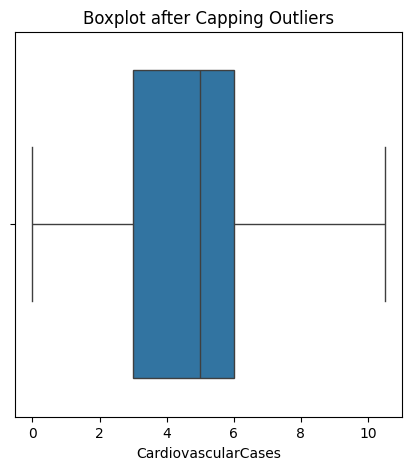

In [ ]:
# Boxplot to visualize the distribution of capped data
plt.figure(figsize=(5, 5))
sns.boxplot(x=data_resampled['CardiovascularCases'])
plt.title('Boxplot after Capping Outliers')

Text(0.5, 1.0, 'Boxplot after Capping Outliers')

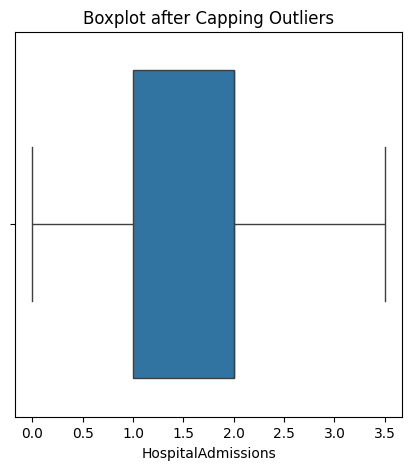

In [ ]:
# Boxplot to visualize the distribution of capped data
plt.figure(figsize=(5, 5))
sns.boxplot(x=data_resampled['HospitalAdmissions'])
plt.title('Boxplot after Capping Outliers')

Text(0.5, 1.0, 'Boxplot after Capping Outliers')

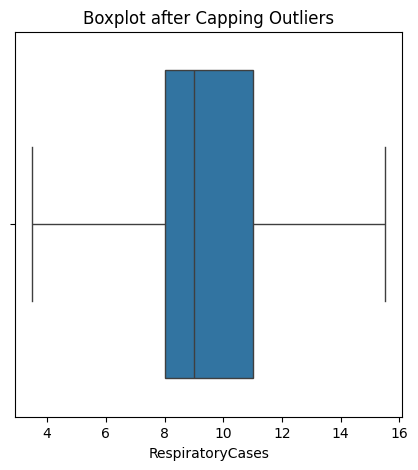

In [ ]:
# Boxplot to visualize the distribution of capped data
plt.figure(figsize=(5, 5))
sns.boxplot(x=data_resampled['RespiratoryCases'])
plt.title('Boxplot after Capping Outliers')

# **Exploratory data analysis**

In [ ]:
data_resampled.columns

Index(['RecordID', 'AQI', 'PM10', 'PM2_5', 'NO2', 'SO2', 'O3', 'Temperature',
       'Humidity', 'WindSpeed', 'RespiratoryCases', 'CardiovascularCases',
       'HospitalAdmissions', 'HealthImpactScore', 'HealthImpactClass'],
      dtype='object')

**Univariate analysis**


To perform a comprehensive univariate analysis of dataset generates histograms for each numerical column including Kernel Density Estimation (KDE) curves to visualize the distribution of data.

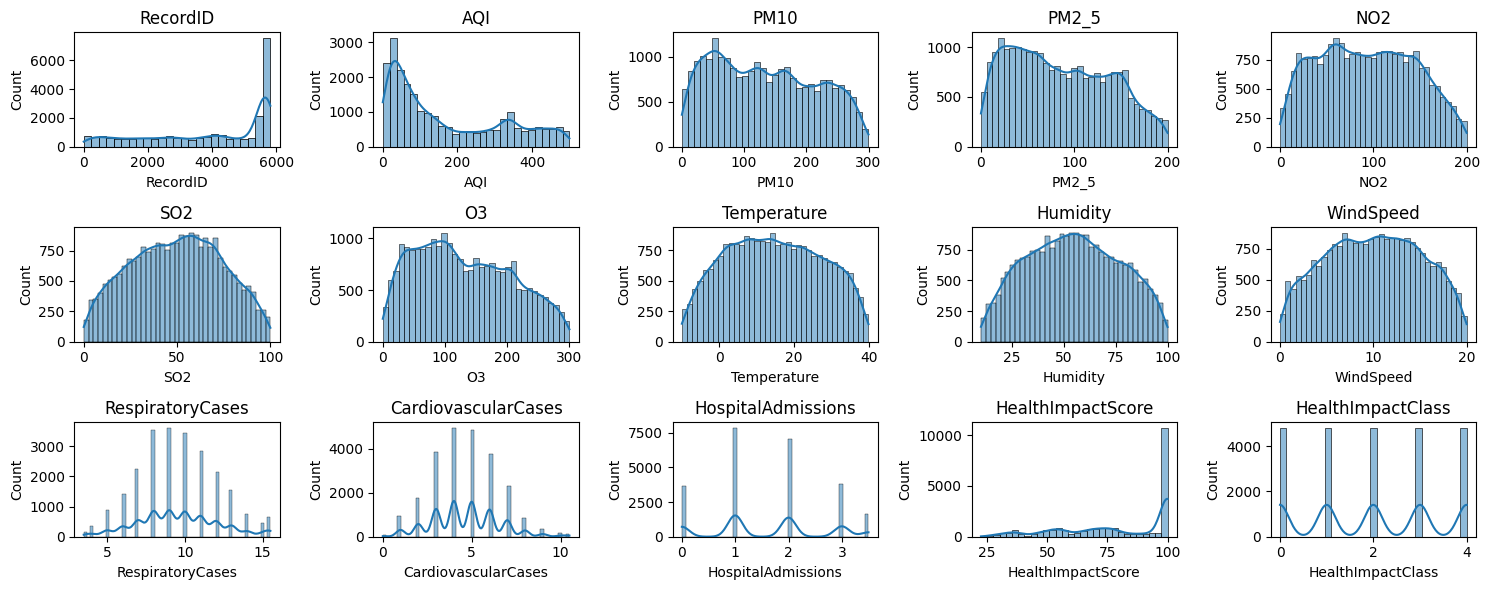

In [ ]:
fig,axes=plt.subplots(nrows=3,ncols=5,figsize=(15,6))
axes=axes.flatten()

for i,column in enumerate(data_resampled.columns):
  sns.histplot(x=data_resampled[column],ax=axes[i],kde=True)
  axes[i].set_title(column)

plt.tight_layout()
plt.show()

**observations**

* Features like "PM10," "Temperature," "Humidity," and "WindSpeed" show a clear bell-shaped curve, suggesting a normal distribution.

* Features like "RecordID" and "HealthImpactScore" have a skewed distribution, meaning the data points are not evenly distributed around the mean.

*  Features like "RespiratoryCases," "CardiovascularCases," and "HealthImpactClass" exhibit multiple peaks, indicating the presence of multiple distinct groups or clusters within the data.

**Bivariate analysis**

 converted the numeric target class values into descriptive labels for better visualization.

In [ ]:
class_mapping={0:'very high',1:'high',2:'moderate',3:'low',4:'very low'}
data_resampled['HealthImpactClass']=data_resampled['HealthImpactClass'].replace(class_mapping)
data_resampled['HealthImpactClass'].value_counts()

,count
HealthImpactClass,
very high,4808
high,4808
low,4808
moderate,4808
very low,4808


**Relationship between air quality metrics and health impact class**

analyzing the relationship between various air quality metrics and health impact classes by creating boxplots.

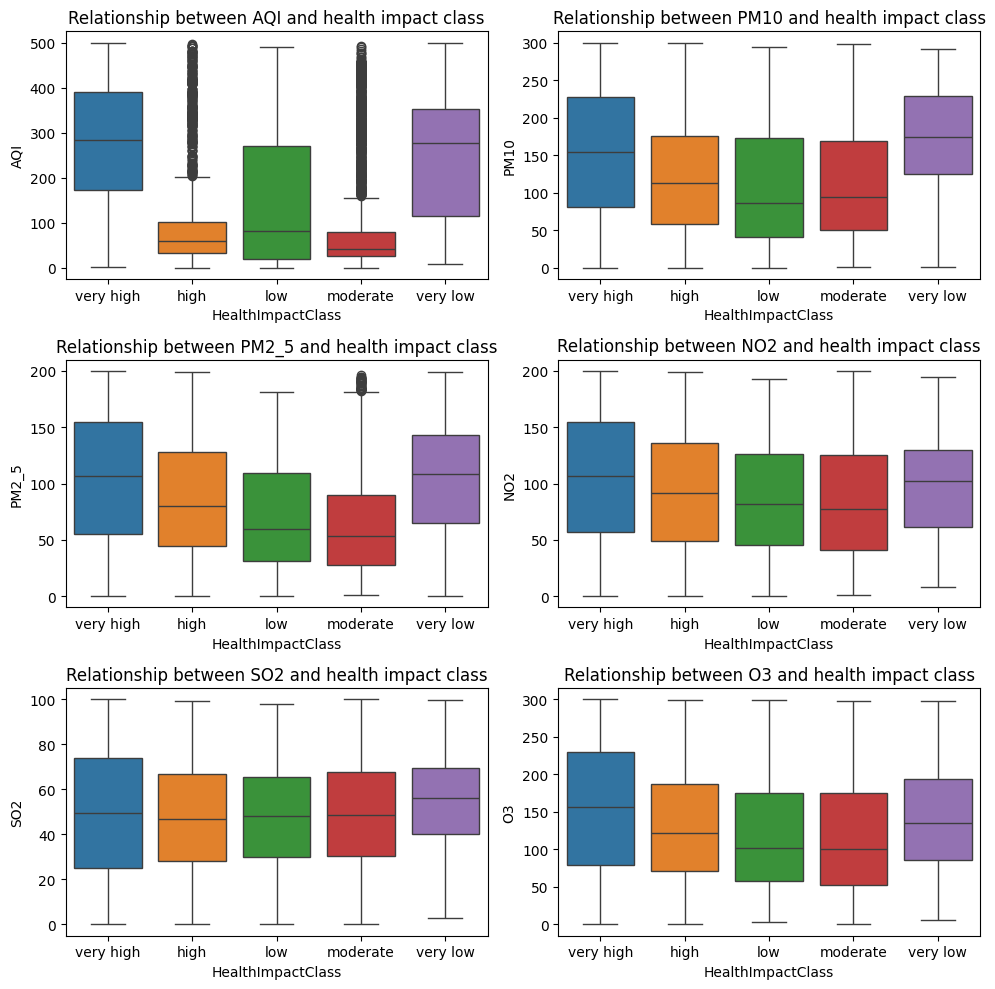

In [ ]:
air_quality_metrics = data_resampled[['AQI', 'PM10', 'PM2_5', 'NO2', 'SO2', 'O3']]
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 10))
axes = axes.flatten()

for i, col in enumerate(air_quality_metrics):
  sns.boxplot(x='HealthImpactClass', y=col, data=data_resampled, palette=color_map,ax=axes[i])

  axes[i].set_title(f'Relationship between {col} and health impact class')


plt.tight_layout()
plt.show()

**observations**:-

The box plot for AQI shows a clear trend where higher AQI values correspond to worse health impact classes.

Similar to AQI, there's a positive association between PM10 levels and the severity of health impact classes.

The median PM2.5 values follow the same pattern as PM10 and AQI, with higher values for worse health impact classes.

The box plot for NO2 shows a less pronounced relationship with health impact class compared to the previous pollutants.

The relationship between SO2 and health impact class is similar to NO2.

The box plot for O3 reveals a different pattern compared to the other pollutants.
.

**Relationship between weather conditions and health impact class**

analyzing the relationship between various air weather conditions and health impact classes by creating boxplots.

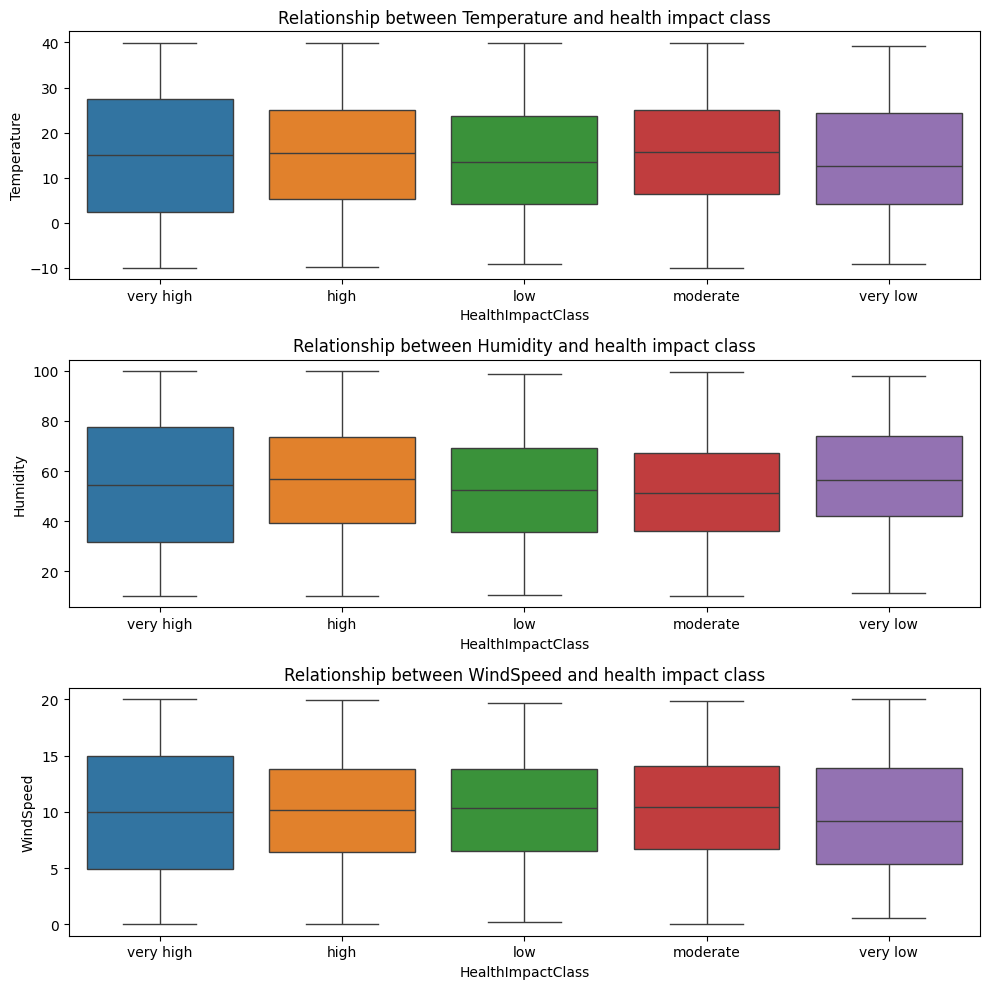

In [ ]:
weather_conditions = data_resampled[[ 'Temperature','Humidity', 'WindSpeed']]
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 10))
axes = axes.flatten()

for i, col in enumerate(weather_conditions):
  sns.boxplot(x='HealthImpactClass', y=col, data=data_resampled, palette=color_map,ax=axes[i])

  axes[i].set_title(f'Relationship between {col} and health impact class')


plt.tight_layout()
plt.show()

**observations:-**

similar to air quality metrics weather conditions are also seems to be impacted on health impact class

Temperature: Higher temperatures are generally associated with a higher health impact.

Humidity: Higher humidity levels are generally associated with a higher health impact.

Wind Speed: Higher wind speeds are generally associated with a higher health impact.



**Relationship between health impact metrics and health impact class**

analyzing the relationship between various health impact metrics and health impact classes by creating boxplots.

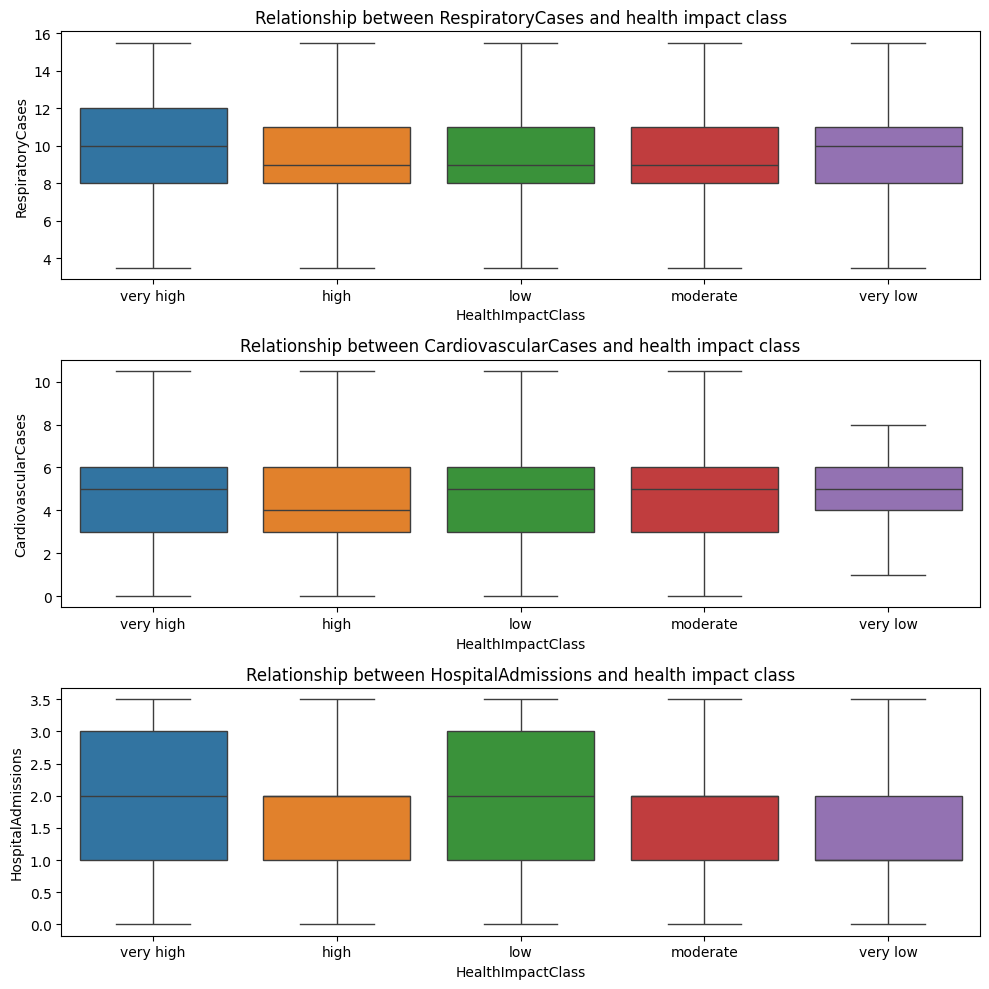

In [ ]:
health_impact_metrics = data_resampled[[ 'RespiratoryCases', 'CardiovascularCases','HospitalAdmissions']]
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 10))
axes = axes.flatten()

for i, col in enumerate(health_impact_metrics):
  sns.boxplot(x='HealthImpactClass', y=col, data=data_resampled, palette=color_map,ax=axes[i])

  axes[i].set_title(f'Relationship between {col} and health impact class')


plt.tight_layout()
plt.show()

**observations:-**

the health impact metrics does not show any vissible trend towards health impact class

**correlation**

to convert the HealthImpactClass column in the dataset from categorical to numerical values.

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data_resampled['HealthImpactClass']=le.fit_transform(data_resampled['HealthImpactClass'])

 visualizing the correlation matrix of the dataset using a heatmap. This visualization helps in understanding the relationships between different numerical variables.

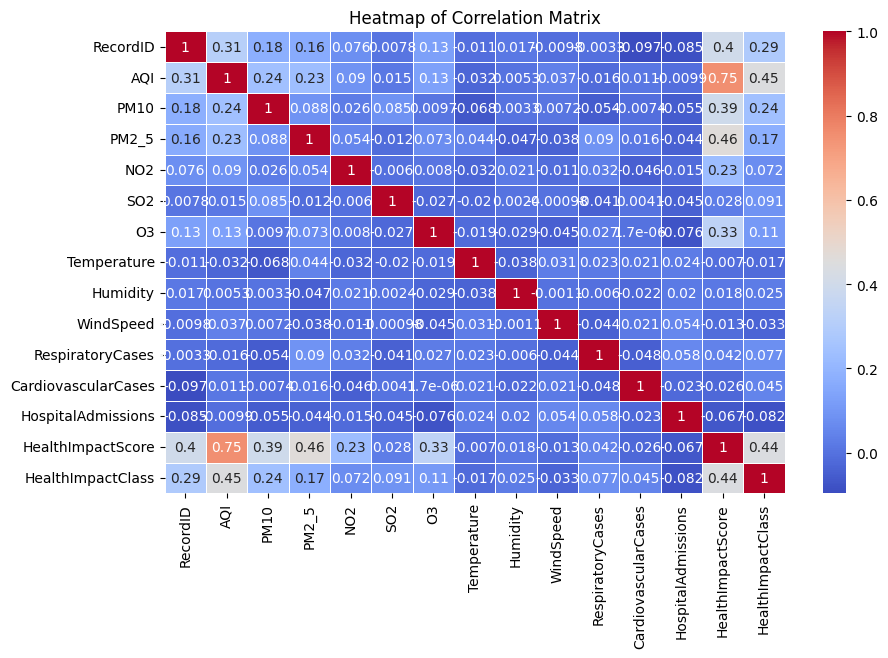

In [ ]:
corr=data_resampled.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of Correlation Matrix')
plt.show()

**observations:-**
The heatmap suggests that air quality indicators like AQI, PM10,PM2_5 and health impact score are strongly correlated with health impact scores and health impact classes.

AQI and health impact score are highly correlated.

PM_10,PM2-5,no2,o3 are also shows some correlation with health impact score.

Most of the other features have a low correlation with each other, indicating they are not strongly related.






visualizing the relationship between air quality metrics and the HealthImpactScore using scatter plots. This approach is useful for understanding how different air quality metrics correlate with health impacts and how various health impact classes are distributed across these metrics.

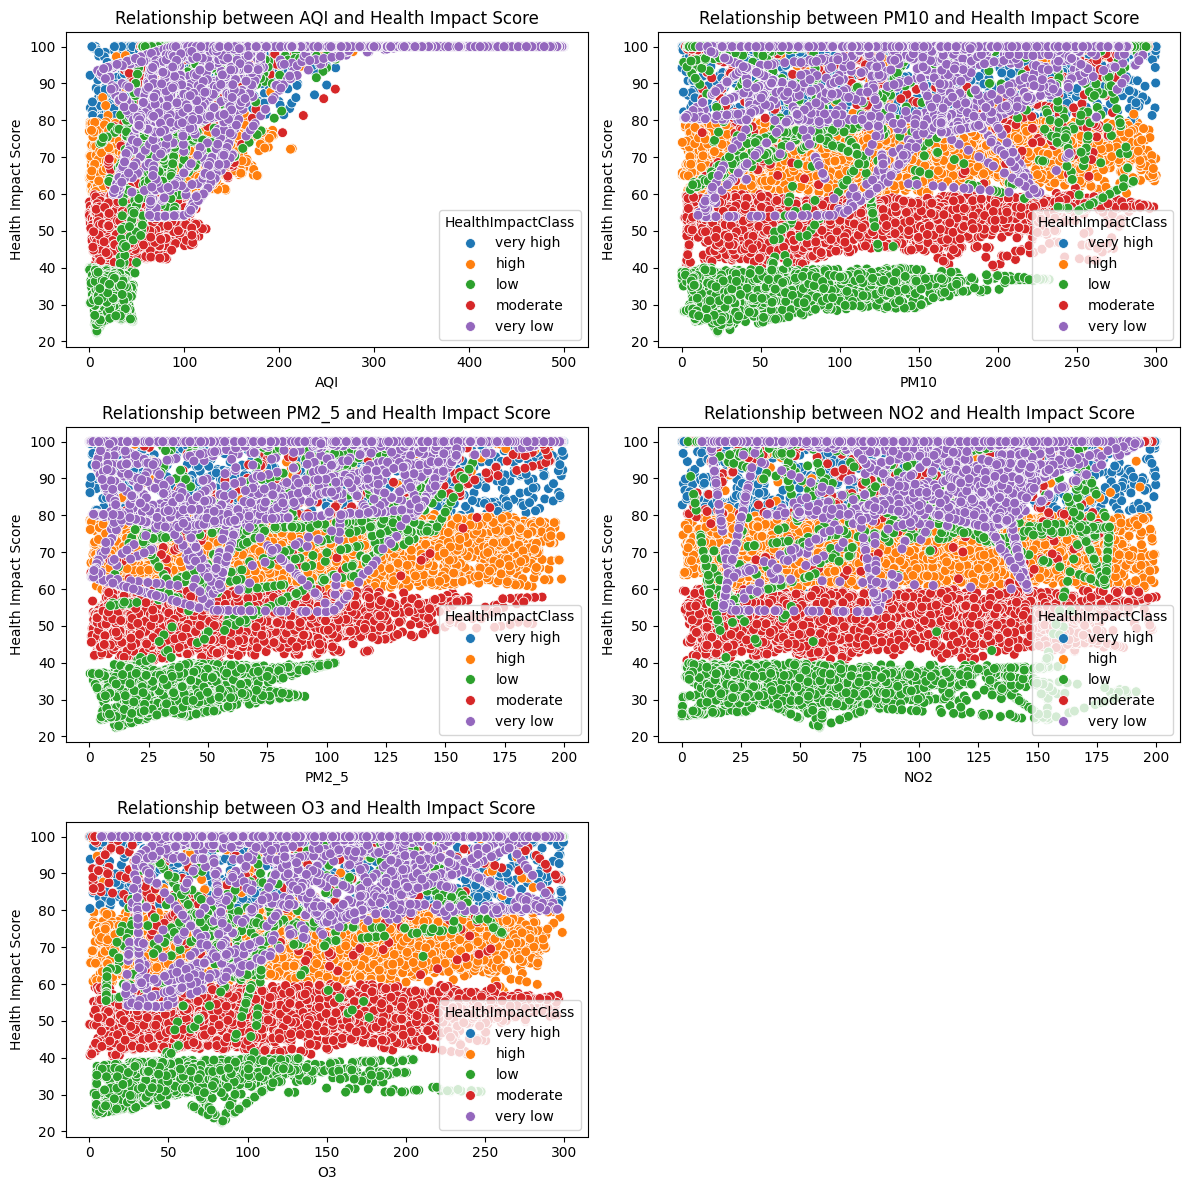

In [ ]:
# Select the air quality metrics columns
air_quality_metrics = data_resampled[['AQI', 'PM10', 'PM2_5', 'NO2', 'O3']]

# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 12))
axes = axes.flatten()

# Iterate through the air quality metrics and plot
for i, col in enumerate(air_quality_metrics):
    sns.scatterplot(x=col, y='HealthImpactScore', hue='HealthImpactClass', data=data_resampled,
                    palette=color_map, ax=axes[i], s=50, edgecolor='white')
    axes[i].set_title(f'Relationship between {col} and Health Impact Score')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Health Impact Score')

# Hide the last subplot if not used
if len(air_quality_metrics.columns) < len(axes):
    fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()


observations:-
* Positive Correlation: In all five plots (AQI, PM10, PM2.5, NO2, and O3), there appears to be a general positive correlation between the pollutant concentration and the health impact score. This suggests that as the levels of these pollutants increase, the associated health risks tend to rise.

* Health Impact Classes: The scatter plots also reveal distinct clusters representing different health impact classes. These clusters indicate that certain ranges of pollutant concentrations are more likely to fall within specific health impact categories.

# **Feature selection**

feature selection is crucial for improving model performance by identifying and using only the most relevant features. The three main types of feature selection performed are filter, wrapper, and embedded.

In [ ]:
#filter method-selectKbest
from sklearn.feature_selection import SelectKBest,f_classif
x=data_resampled.drop(['HealthImpactClass','RecordID'],axis=1)
y=data_resampled['HealthImpactClass']

selector=SelectKBest(f_classif,k=10)
x_new=selector.fit_transform(x,y)
f_selected_features = x.columns[selector.get_support()]
print("ANOVA selected features:", f_selected_features)

ANOVA selected features: Index(['AQI', 'PM10', 'PM2_5', 'NO2', 'SO2', 'O3', 'Humidity',
       'CardiovascularCases', 'HospitalAdmissions', 'HealthImpactScore'],
      dtype='object')


In [ ]:
#wrapper method
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
x=data_resampled.drop(['HealthImpactClass','RecordID'],axis=1)
y=data_resampled['HealthImpactClass']
model=LogisticRegression()

rfe = RFE(model, n_features_to_select=10)
fit = rfe.fit(x, y)

print("Selected features: %s" % x.columns[fit.support_])
print("Feature ranking: %s" % fit.ranking_)


Selected features: Index(['AQI', 'PM2_5', 'SO2', 'Temperature', 'Humidity', 'WindSpeed',
       'RespiratoryCases', 'CardiovascularCases', 'HospitalAdmissions',
       'HealthImpactScore'],
      dtype='object')
Feature ranking: [1 3 1 2 1 4 1 1 1 1 1 1 1]


In [ ]:
#embeded method -lasso regularization
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
x=data_resampled.drop(['HealthImpactClass','RecordID'],axis=1)
y=data_resampled['HealthImpactClass']

# Lasso for feature selection
lasso = Lasso(alpha=0.1)
model = lasso.fit(x, y)
selected_features =x.columns[model.coef_ != 0]
selected_features

Index(['AQI', 'PM10', 'PM2_5', 'NO2', 'SO2', 'O3', 'Humidity', 'WindSpeed',
       'RespiratoryCases', 'CardiovascularCases', 'HealthImpactScore'],
      dtype='object')

# **Split data into train test split**

In [ ]:
data_resampled.columns

Index(['RecordID', 'AQI', 'PM10', 'PM2_5', 'NO2', 'SO2', 'O3', 'Temperature',
       'Humidity', 'WindSpeed', 'RespiratoryCases', 'CardiovascularCases',
       'HospitalAdmissions', 'HealthImpactScore', 'HealthImpactClass'],
      dtype='object')

In [ ]:
# models using all features
x=data_resampled.drop(['RecordID','HealthImpactClass'],axis=1)
y=data_resampled['HealthImpactClass']


from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=0)

# **feature** **scaling**

 standardizing training and testing data using StandardScaler to ensure that each feature has a mean of 0 and a standard deviation of 1, improving the performance  of  machine learning models.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.fit_transform(x_test)

# **Model building** **and Evaluation**

building models using different feature sets—full feature set, features selected through filter, wrapper, and embedded methods—and is concerned about overfitting. To address this,  models are built using Ridge and Lasso regularization techniques and also models with data contain outliers

 defined a function to evaluate_model to assess the performance of various models using common classification metrics. The function calculates and prints the accuracy, precision, recall, F1-score, and confusion matrix for each model then evaluates multiple models including Logistic Regression, SVM, Gradient Boosting, Decision Tree, and KNN using this function.

 **models using all features**

In [ ]:
# models using all features
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

#logistic regression model
log_model=LogisticRegression()
log_model.fit(x_train_scaled,y_train)
y_predict_log=log_model.predict(x_test_scaled)

#decision tree model
tree_model= DecisionTreeClassifier()
tree_model.fit(x_train_scaled,y_train)
y_predict_tree=tree_model.predict(x_test_scaled)

# SVM
svm_model = SVC()
svm_model.fit(x_train_scaled, y_train)
y_pred_svm = svm_model.predict(x_test_scaled)


# Gradient Boosting
gb_model = GradientBoostingClassifier()
gb_model.fit(x_train_scaled, y_train)
y_pred_gb = gb_model.predict(x_test_scaled)

# KNN
knn_model=KNeighborsClassifier()
knn_model.fit(x_train_scaled, y_train)
y_pred_knn = knn_model.predict(x_test_scaled)

In [ ]:
#models evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc

# Evaluation function
def evaluate_model(model_name, y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    confusion_mat = confusion_matrix(y_true, y_pred)

    print(f"Model: {model_name}")
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-score:", f1)
    print("Confusion Matrix:\n", confusion_mat)
    print("\n")

# Evaluate models
evaluate_model("Logistic Regression", y_test, y_predict_log)
evaluate_model("SVM", y_test, y_pred_svm)
evaluate_model("Gradient Boosting", y_test, y_pred_gb)
evaluate_model("decision tree", y_test, y_predict_tree)
evaluate_model("KNN", y_test, y_pred_knn)

Model: Logistic Regression
Accuracy: 0.5166389351081531
Precision: 0.4760049781868706
Recall: 0.5166389351081531
F1-score: 0.48655778527865107
Confusion Matrix:
 [[734  96  92  41  37]
 [ 98  64 354 266 127]
 [ 91 111 607  85  73]
 [ 75  28   1 614 227]
 [178  27  19 298 465]]


Model: SVM
Accuracy: 0.9467554076539102
Precision: 0.946711235564296
Recall: 0.9467554076539102
F1-score: 0.9464325273608024
Confusion Matrix:
 [[931   8   5  41  15]
 [  3 894   6   0   6]
 [ 25   3 902  28   9]
 [ 30  31  17 842  25]
 [  4   0   0   0 983]]


Model: Gradient Boosting
Accuracy: 0.8612728785357737
Precision: 0.8666744038976251
Recall: 0.8612728785357737
F1-score: 0.8619217719070236
Confusion Matrix:
 [[907  24   4  28  37]
 [ 39 760  10  40  60]
 [ 16  31 791  83  46]
 [  3  59   4 792  87]
 [ 45  20   6  25 891]]


Model: decision tree
Accuracy: 0.9041181364392679
Precision: 0.9035615982394211
Recall: 0.9041181364392679
F1-score: 0.9036529356260782
Confusion Matrix:
 [[918  25  12  35  10]
 [ 

**observation:-**
SVM model excels in all major metrics—accuracy, precision, recall, and F1-score—indicating that it performs best among the models

In [ ]:
#comparing test and train accuracy of SVM model
train_accuracy = svm_model.score(x_train_scaled, y_train)
test_accuracy = svm_model.score(x_test_scaled, y_test)
print(f"Training Accuracy: {train_accuracy }")
print(f"Test Accuracy: {test_accuracy }")
acuracy_shift_svm=train_accuracy-test_accuracy
print('difference between train and test accuracy shift',acuracy_shift_svm)

Training Accuracy: 0.9578826955074875
Test Accuracy: 0.9467554076539102
difference between train and test accuracy shift 0.011127287853577306


**models using features selected from filter method**

In [ ]:
# models using features selected from filter(selectkbest) method
x_filter=data_resampled[['AQI', 'PM10', 'PM2_5', 'NO2', 'SO2', 'O3', 'Humidity','RespiratoryCases', 'HospitalAdmissions','HealthImpactScore']]
y=data_resampled['HealthImpactClass']


from sklearn.model_selection import train_test_split
x_filter_train,x_filter_test,y_train,y_test=train_test_split(x_filter,y,test_size=0.2, random_state=0)
# feature scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_filter_train_scaled=scaler.fit_transform(x_filter_train)
x_filter_test_scaled=scaler.fit_transform(x_filter_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import  GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

#logistic regression model
log_model1=LogisticRegression()
log_model1.fit(x_filter_train_scaled,y_train)
y_predict_log1=log_model1.predict(x_filter_test_scaled)

#decision tree model
tree_model1= DecisionTreeClassifier()
tree_model1.fit(x_filter_train_scaled,y_train)
y_predict_tree1=tree_model1.predict(x_filter_test_scaled)

# SVM
svm_model1 = SVC()
svm_model1.fit(x_filter_train_scaled, y_train)
y_pred_svm1= svm_model1.predict(x_filter_test_scaled)


# Gradient Boosting
gb_model1 = GradientBoostingClassifier()
gb_model1.fit(x_train_scaled, y_train)
y_pred_gb1 = gb_model1.predict(x_test_scaled)

# KNN
knn_model1=KNeighborsClassifier()
knn_model1.fit(x_filter_train_scaled, y_train)
y_pred_knn1 = knn_model1.predict(x_filter_test_scaled)

In [ ]:
#model evaluation

# Evaluation function
def evaluate_model(model_name, y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    confusion_mat = confusion_matrix(y_true, y_pred)

    print(f"Model: {model_name}")
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-score:", f1)
    print("Confusion Matrix:\n", confusion_mat)
    print("\n")

# Evaluate models
evaluate_model("Logistic Regression", y_test, y_predict_log1)
evaluate_model("SVM", y_test, y_pred_svm1)
evaluate_model("Gradient Boosting", y_test, y_pred_gb1)
evaluate_model("decision tree", y_test, y_predict_tree1)
evaluate_model("KNN", y_test, y_pred_knn1)


Model: Logistic Regression
Accuracy: 0.5147670549084858
Precision: 0.4648067109531155
Recall: 0.5147670549084858
F1-score: 0.48104096753392983
Confusion Matrix:
 [[730  91  93  44  42]
 [ 94  38 375 285 117]
 [101  91 615 100  60]
 [ 76  34   1 607 227]
 [170  37   6 289 485]]


Model: SVM
Accuracy: 0.9199251247920133
Precision: 0.9209738822654876
Recall: 0.9199251247920133
F1-score: 0.9194367347305984
Confusion Matrix:
 [[920   7   6  47  20]
 [ 10 876   7   0  16]
 [ 33  18 845  57  14]
 [ 29  47  11 808  50]
 [ 12   1   0   0 974]]


Model: Gradient Boosting
Accuracy: 0.8610648918469218
Precision: 0.8664708417516029
Recall: 0.8610648918469218
F1-score: 0.8617242469199176
Confusion Matrix:
 [[907  24   4  28  37]
 [ 39 760  10  40  60]
 [ 16  31 791  83  46]
 [  3  59   4 792  87]
 [ 45  20   6  26 890]]


Model: decision tree
Accuracy: 0.9001663893510815
Precision: 0.8992952330305659
Recall: 0.9001663893510815
F1-score: 0.8993692615825613
Confusion Matrix:
 [[931  21  10  25  13]
 [

observation:-SVM model excels in all major metrics—accuracy, precision, recall, and F1-score—indicating that it performs best among the models

In [ ]:
#comparing test and train accuracy of SVM
train_accuracy = svm_model1.score(x_filter_train_scaled, y_train)
test_accuracy = svm_model1.score(x_filter_test_scaled, y_test)
print(f"Training Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")
acuracy_shift_svm_filter=train_accuracy-test_accuracy
print('difference between train and test accuracy shift',acuracy_shift_svm_filter)

Training Accuracy: 0.9214850249584027
Test Accuracy: 0.9199251247920133
difference between train and test accuracy shift 0.0015599001663894052


**models using features selected from wrapper method**

In [ ]:
# models using features selected from wrappper methodmethod
x_wrapper=data_resampled[['AQI', 'PM2_5', 'SO2', 'Temperature', 'Humidity', 'WindSpeed',
       'RespiratoryCases', 'CardiovascularCases', 'HospitalAdmissions',
       'HealthImpactScore']]
y=data_resampled['HealthImpactClass']


from sklearn.model_selection import train_test_split
x_wrapper_train,x_wrapper_test,y_train,y_test=train_test_split(x_wrapper,y,test_size=0.2, random_state=0)
# feature scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_wrapper_train_scaled=scaler.fit_transform(x_wrapper_train)
x_wrapper_test_scaled=scaler.fit_transform(x_wrapper_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import  GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

#logistic regression model
log_model2=LogisticRegression()
log_model2.fit(x_wrapper_train_scaled,y_train)
y_predict_log2=log_model2.predict(x_wrapper_test_scaled)

#decision tree model
tree_model2= DecisionTreeClassifier()
tree_model2.fit(x_wrapper_train_scaled,y_train)
y_predict_tree2=tree_model2.predict(x_wrapper_test_scaled)

# SVM
svm_model2 = SVC()
svm_model2.fit(x_wrapper_train_scaled, y_train)
y_pred_svm2= svm_model2.predict(x_wrapper_test_scaled)


# Gradient Boosting
gb_model2= GradientBoostingClassifier()
gb_model2.fit(x_wrapper_train_scaled, y_train)
y_pred_gb2 = gb_model2.predict(x_wrapper_test_scaled)



# KNN
knn_model2=KNeighborsClassifier()
knn_model2.fit(x_wrapper_train_scaled, y_train)
y_pred_knn2 = knn_model2.predict(x_wrapper_test_scaled)

In [ ]:
#model evaluation

# Evaluation function
def evaluate_model(model_name, y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    confusion_mat = confusion_matrix(y_true, y_pred)

    print(f"Model: {model_name}")
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-score:", f1)
    print("Confusion Matrix:\n", confusion_mat)
    print("\n")

# Evaluate models
evaluate_model("Logistic Regression", y_test, y_predict_log2)
evaluate_model("SVM", y_test, y_pred_svm2)
evaluate_model("Gradient Boosting", y_test, y_pred_gb2)
evaluate_model("decision tree", y_test, y_predict_tree2)
evaluate_model("KNN", y_test, y_pred_knn2)


Model: Logistic Regression
Accuracy: 0.5014559068219634
Precision: 0.461227588625678
Recall: 0.5014559068219634
F1-score: 0.46806277124068213
Confusion Matrix:
 [[700  74 148  43  35]
 [ 93  52 369 269 126]
 [112  71 625  89  70]
 [ 63  27   2 606 247]
 [148  26  32 353 428]]


Model: SVM
Accuracy: 0.9059900166389351
Precision: 0.9073882878450135
Recall: 0.9059900166389351
F1-score: 0.9054809431557588
Confusion Matrix:
 [[919  11  10  36  24]
 [ 28 855   6   8  12]
 [ 28  17 843  54  25]
 [ 33  62  11 779  60]
 [ 14   6   0   7 960]]


Model: Gradient Boosting
Accuracy: 0.8271630615640599
Precision: 0.8345995055080467
Recall: 0.8271630615640599
F1-score: 0.8283032771268694
Confusion Matrix:
 [[907  20   4  34  35]
 [ 56 703   8  65  77]
 [ 17  28 782  78  62]
 [  2  89   3 736 115]
 [ 56  27   4  51 849]]


Model: decision tree
Accuracy: 0.8924708818635607
Precision: 0.8915003047746732
Recall: 0.8924708818635607
F1-score: 0.8916727391501722
Confusion Matrix:
 [[924  22   7  26  21]
 [ 

**OBSERVATION:-**
SVM Model has the highest performance across all metrics (accuracy, precision, recall, and F1-score).

In [ ]:
#comparing test and train accuracy SVM
train_accuracy = svm_model2.score(x_wrapper_train_scaled, y_train)
test_accuracy = svm_model2.score(x_wrapper_test_scaled, y_test)
print(f"Training Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")
acuracy_shift_svm_wrapper=train_accuracy-test_accuracy
print('difference between train and test accuracy shift',acuracy_shift_svm_wrapper)

Training Accuracy: 0.9119696339434277
Test Accuracy: 0.9059900166389351
difference between train and test accuracy shift 0.0059796173044925904


**models using features selected from embeded method**

In [ ]:
# models using features selected from embeded method
x_embeded=data_resampled[['AQI', 'PM10', 'PM2_5', 'SO2', 'O3', 'WindSpeed', 'RespiratoryCases',
       'HealthImpactScore']]
y=data_resampled['HealthImpactClass']


from sklearn.model_selection import train_test_split
x_embeded_train,x_embeded_test,y_train,y_test=train_test_split(x_embeded,y,test_size=0.2, random_state=0)
# feature scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_embeded_train_scaled=scaler.fit_transform(x_embeded_train)
x_embeded_test_scaled=scaler.fit_transform(x_embeded_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import  GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

#logistic regression model
log_model3=LogisticRegression()
log_model3.fit(x_embeded_train_scaled,y_train)
y_predict_log3=log_model3.predict(x_embeded_test_scaled)

#decision tree model
tree_model3= DecisionTreeClassifier()
tree_model3.fit(x_embeded_train_scaled,y_train)
y_predict_tree3=tree_model3.predict(x_embeded_test_scaled)

# SVM
svm_model3 = SVC()
svm_model3.fit(x_embeded_train_scaled, y_train)
y_pred_svm3= svm_model3.predict(x_embeded_test_scaled)


# Gradient Boosting
gb_model3= GradientBoostingClassifier()
gb_model3.fit(x_embeded_train_scaled, y_train)
y_pred_gb3 = gb_model3.predict(x_embeded_test_scaled)



# KNN
knn_model3=KNeighborsClassifier()
knn_model3.fit(x_embeded_train_scaled, y_train)
y_pred_knn3 = knn_model3.predict(x_embeded_test_scaled)

In [ ]:
# model evaluation
# Evaluation function
def evaluate_model(model_name, y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    confusion_mat = confusion_matrix(y_true, y_pred)

    print(f"Model: {model_name}")
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-score:", f1)
    print("Confusion Matrix:\n", confusion_mat)
    print("\n")

# Evaluate models
evaluate_model("Logistic Regression", y_test, y_predict_log3)
evaluate_model("SVM", y_test, y_pred_svm3)
evaluate_model("Gradient Boosting", y_test, y_pred_gb3)
evaluate_model("decision tree", y_test, y_predict_tree3)
evaluate_model("KNN", y_test, y_pred_knn3)


Model: Logistic Regression
Accuracy: 0.5097753743760399
Precision: 0.4640749299503778
Recall: 0.5097753743760399
F1-score: 0.47219101597384816
Confusion Matrix:
 [[753  99  73  61  14]
 [ 91  29 383 340  66]
 [ 76  83 641 134  33]
 [ 75  23   0 648 199]
 [180  40  11 376 380]]


Model: SVM
Accuracy: 0.8683444259567388
Precision: 0.8722898513370765
Recall: 0.8683444259567388
F1-score: 0.8677940926648374
Confusion Matrix:
 [[906  14   5  43  32]
 [ 61 780   8  12  48]
 [ 31  26 810  78  22]
 [ 27  70  16 729 103]
 [ 33   3   0   1 950]]


Model: Gradient Boosting
Accuracy: 0.8171797004991681
Precision: 0.8261589761299698
Recall: 0.8171797004991681
F1-score: 0.8185785953266044
Confusion Matrix:
 [[907  19   3  30  41]
 [ 65 674   8  74  88]
 [ 15  31 786  79  56]
 [  1  67   7 723 147]
 [ 49  20   9  70 839]]


Model: decision tree
Accuracy: 0.8964226289517471
Precision: 0.8956564169313593
Recall: 0.8964226289517471
F1-score: 0.8957118957396963
Confusion Matrix:
 [[926  17  13  25  19]
 [

KNN Model has the highest performance across all metrics (accuracy, precision, recall, and F1-score).

In [ ]:
#comapring test and train accuracy KNN
train_accuracy = knn_model3.score(x_embeded_train_scaled, y_train)
test_accuracy = knn_model3.score(x_embeded_test_scaled, y_test)
print(f"Training Accuracy: {train_accuracy }")
print(f"Test Accuracy: {test_accuracy }")
acuracy_shift_knn_embeded=train_accuracy-test_accuracy
print('difference between train and test accuracy shift',acuracy_shift_knn_embeded)

Training Accuracy: 0.932664309484193
Test Accuracy: 0.9070299500831946
difference between train and test accuracy shift 0.02563435940099834


**regularization model-ridge classifier**

In [ ]:
#regularization algorithm-ridge classifier
x=data_resampled.drop(['RecordID','HealthImpactClass'],axis=1)
y=data_resampled['HealthImpactClass']

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=0)


#scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.fit_transform(x_test)

#ridge classifier model
from sklearn.linear_model import RidgeClassifier
ridge_model=RidgeClassifier()
ridge_model.fit(x_train_scaled,y_train)

# Making predictions on the test data
y_pred_ridge = ridge_model.predict(x_test_scaled)


In [ ]:
# Evaluation function
def evaluate_model(model_name, y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    confusion_mat = confusion_matrix(y_true, y_pred)

    print(f"Model: {model_name}")
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-score:", f1)
    print("Confusion Matrix:\n", confusion_mat)
    print("\n")

# Evaluate models
evaluate_model("ridge classifier", y_test, y_pred_ridge)


Model: ridge classifier
Accuracy: 0.5029118136439268
Precision: 0.42212712639436845
Recall: 0.5029118136439268
F1-score: 0.4561476884939178
Confusion Matrix:
 [[610  81 198  46  65]
 [110   2 407 244 146]
 [ 88  27 696  82  74]
 [113   1   0 596 235]
 [162  12  36 263 514]]




**regularization-lasso**

In [ ]:
#lasso
lasso_model = LogisticRegression(penalty='l1', solver='saga', multi_class='multinomial', max_iter=10000)
lasso_model.fit(x_train_scaled, y_train)
# Predict
y_pred_lasso = lasso_model.predict(x_test_scaled)
# Evaluation function
def evaluate_model(model_name, y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    confusion_mat = confusion_matrix(y_true, y_pred)

    print(f"Model: {model_name}")
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-score:", f1)
    print("Confusion Matrix:\n", confusion_mat)
    print("\n")

# Evaluate models
evaluate_model("lasso regularization", y_test, y_pred_lasso)

Model: lasso regularization
Accuracy: 0.5166389351081531
Precision: 0.4760447856822912
Recall: 0.5166389351081531
F1-score: 0.4865621200850484
Confusion Matrix:
 [[734  96  92  41  37]
 [ 98  64 354 267 126]
 [ 91 111 607  85  73]
 [ 75  28   1 614 227]
 [178  27  19 298 465]]




**models without handling outliers**

In [ ]:
#model building using data without handling outliers


df=data.copy()
#Handling imbalance by over sampling technique
from imblearn.over_sampling import RandomOverSampler
feature=df.drop('HealthImpactClass',axis=1)
target=df['HealthImpactClass']

oversampler=RandomOverSampler(random_state=0)
feature_resampled,target_resampled=oversampler.fit_resample(feature,target)

df_resampled=pd.concat([feature_resampled,target_resampled],axis=1)

#train test split
feature_train,feature_test,target_train,target_test=train_test_split(feature_resampled,target_resampled,test_size=0.2,random_state=0)
#scaling the features
feature_train_scaled=scaler.fit_transform(feature_train)
feature_test_scaled=scaler.fit_transform(feature_test)

# models
#logistic regression model
log_outlier=LogisticRegression()
log_outlier.fit(feature_train_scaled,target_train)
y_predict_log_out=log_outlier.predict(feature_test_scaled)

#decision tree model
tree_outlier= DecisionTreeClassifier()
tree_outlier.fit(feature_train_scaled,target_train)
y_predict_tree_out=tree_outlier.predict(feature_test_scaled)

# SVM
svm_outlier= SVC()
svm_outlier.fit(feature_train_scaled,target_train)
y_pred_svm_out= svm_outlier.predict(feature_test_scaled)


# Gradient Boosting
gb_outlier= GradientBoostingClassifier()
gb_outlier.fit(feature_train_scaled,target_train)
y_pred_gb_out = gb_outlier.predict(feature_test_scaled)


# KNN
knn_outlier=KNeighborsClassifier()
knn_outlier.fit(feature_train_scaled,target_train)
y_pred_knn_out= knn_outlier.predict(feature_test_scaled)

In [ ]:
# Evaluation function
def evaluate_model(model_name, y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    confusion_mat = confusion_matrix(y_true, y_pred)

    print(f"Model: {model_name}")
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-score:", f1)
    print("Confusion Matrix:\n", confusion_mat)
    print("\n")

# Evaluate models
evaluate_model("Logistic Regression", target_test, y_predict_log_out)
evaluate_model("SVM",target_test , y_pred_svm_out)
evaluate_model("Gradient Boosting", target_test, y_pred_gb_out)
evaluate_model("decision tree", target_test, y_predict_tree_out)
evaluate_model("KNN", target_test, y_pred_knn_out)


Model: Logistic Regression
Accuracy: 0.6314475873544093
Precision: 0.6320413958740773
Recall: 0.6314475873544093
F1-score: 0.6231641650665593
Confusion Matrix:
 [[845  53   0  21  26]
 [  9 688 128  91  84]
 [  5 160 424 207 171]
 [  0  43 209 260 397]
 [ 16  15   0 137 819]]


Model: SVM
Accuracy: 0.9792013311148087
Precision: 0.9793236489299313
Recall: 0.9792013311148087
F1-score: 0.979080505152345
Confusion Matrix:
 [[885  32  10  11   7]
 [  9 968  15   1   7]
 [  0   8 959   0   0]
 [  0   0   0 909   0]
 [  0   0   0   0 987]]


Model: Gradient Boosting
Accuracy: 0.9228369384359401
Precision: 0.9253811662167242
Recall: 0.9228369384359401
F1-score: 0.9228788651520854
Confusion Matrix:
 [[934   4   1   4   2]
 [  1 917  33  21  28]
 [  5   2 867  56  37]
 [ 12   6   0 858  33]
 [103   0   0  23 861]]


Model: decision tree
Accuracy: 0.9396838602329451
Precision: 0.9437807643851911
Recall: 0.9396838602329451
F1-score: 0.9390275324742018
Confusion Matrix:
 [[934   2   2   5   2]
 [  

SVM Model consistently has the highest performance across all metrics (accuracy, precision, recall, and F1-score).

In [ ]:
train_accuracy =svm_outlier .score(feature_train_scaled,target_train)
test_accuracy = svm_outlier.score(feature_test_scaled,target_test)
print(f"Training Accuracy: {train_accuracy }")
print(f"Test Accuracy: {test_accuracy }")
acuracy_shift_out_svm=train_accuracy-test_accuracy
print('difference between train and test accuracy shift',acuracy_shift_out_svm)

Training Accuracy: 0.9884047420965059
Test Accuracy: 0.9792013311148087
difference between train and test accuracy shift 0.009203410981697191


**comparing train test accuracy of high perfomance models performed with features selected from different methods**

comparing the accuracy differences between training and testing sets for high-performance models, evaluated using features selected by different methods

In [ ]:
# comparing train test accuracy of high perfomance models performed with features selected from different methods
print('test train accuracy difference of SVM model( using all features)',acuracy_shift_svm)
print('test train accuracy difference of SVM model( features from filter method)',acuracy_shift_svm_filter)
print('test train accuracy difference of SVM model( features from wrapper method)',acuracy_shift_svm_wrapper)
print('test train accuracy difference of KNN model( features from embeded method)',acuracy_shift_knn_embeded)
print('test train accuracy difference of SVM model( with outliers)',acuracy_shift_out_svm)

test train accuracy difference of random forest model( using all features) 0.011127287853577306
test train accuracy difference of KNN model( features from filter method) 0.0015599001663894052
test train accuracy difference of random forest model( features from wrapper method) 0.0059796173044925904
test train accuracy difference of KNN model( features from embeded method) 0.02563435940099834
test train accuracy difference of SVM model( with outliers) 0.009203410981697191


**OBSERVATION:-**
None of the models show extreme signs of overfitting.

SVM Model( using features features selected from filter method) having the least accuracy difference between train and test accuracy(0.0015)

**ROC-AUC curv**

evaluating the performance of an SVM model using a multi-class ROC curve and calculating the average ROC AUC score.

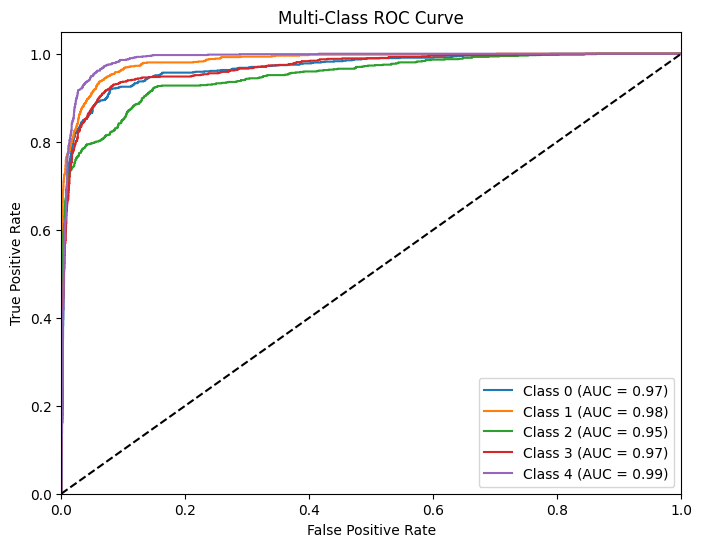

Average ROC AUC: 0.9714972157439062


In [ ]:
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np

# Initialize the SVM model with probability=True
svm_model1 = SVC(probability=True)

# Binarize the labels
y_test_binary = label_binarize(y_test, classes=np.unique(y_test))

# One-vs-Rest classifier
clf = OneVsRestClassifier(svm_model1)
clf.fit(x_filter_test_scaled, y_test_binary)

# Get probability scores
y_score = clf.predict_proba(x_filter_test_scaled)

# Calculate ROC curves and AUCs
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_test_binary.shape[1]
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binary[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='Class {} (AUC = {:.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class ROC Curve')
plt.legend(loc="lower right")
plt.show()

# Calculate average ROC AUC
average_roc_auc = roc_auc_score(y_test_binary, y_score, average='macro')
print("Average ROC AUC:", average_roc_auc)


**OBSERVATION:-**
* High AUC Values: All classes have high AUC values, indicating that the model is performing well overall. This means the model is able to distinguish between positive and negative classes effectively.
* Class 4 has the highest AUC value (0.99), indicating that the model is most accurate in classifying this particular class.
* Class 2 has the lowest AUC value (0.95), suggesting that the model might struggle slightly with this class compared to the others.

Overall, the ROC AUC curve indicates that the multi-class classification model is performing very well.

# **Hyper tuning parameter**

performing hyperparameter tuning for an SVM model using RandomizedSearchCV to find the optimal parameters for  model.

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV


param_grid = {
    'C': [0.1, 1, 10],                    # Regularization parameter
    'kernel': ['linear', 'rbf'],          # Focusing on the most common kernels
    'gamma': ['scale', 'auto'],           # Kernel coefficient
    'probability': [True]                 # Ensure probability estimates are enabled
}
svm_best_model = SVC()


random_search = RandomizedSearchCV(svm_best_model, param_distributions=param_grid,
                                   n_iter=5, cv=3, scoring='accuracy', random_state=42)
random_search.fit(x_filter_train_scaled, y_train)


print("Best hyperparameters:", random_search.best_params_)
print("Best score:", random_search.best_score_)


Best hyperparameters: {'probability': True, 'kernel': 'rbf', 'gamma': 'scale', 'C': 10}
Best score: 0.9504993570511812


In [ ]:
# Initialize the SVM model with the best parameters from hyperparameter tuning
svm_best_model = SVC(
    C=random_search.best_params_['C'],
    kernel=random_search.best_params_['kernel'],
    gamma=random_search.best_params_['gamma'],
    probability=random_search.best_params_['probability']
)

# Train the model on the selected features
svm_best_model.fit(x_filter_train_scaled, y_train)

# Make predictions on the test set
y_pred = svm_best_model.predict(x_filter_test_scaled)


# **Cross validation**

evaluating the performance of  SVM model using cross-validation to get a better understanding of its accuracy across different subsets of the training data.

In [ ]:
#cross validation of KNN model (feature selected filter method)
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(svm_best_model,x_filter_train_scaled,y_train,cv=5, scoring='accuracy')

# Print cross-validation results
print("Cross-validation scores for svm:", cv_scores)
print("Mean accuracy:", cv_scores.mean(), "(+/-", cv_scores.std(), ")")

Cross-validation scores for svm: [0.95502989 0.95502989 0.9576183  0.95605824 0.95553822]
Mean accuracy: 0.9558549110875274 (+/- 0.0009604687718747607 )


The mean accuracy of approximately 95.59% indicates that your SVM model performs very well on the dataset.

The standard deviation is very small (around 0.00096), indicating that the model's performance is consistent across the different folds.

 consistent performance across all folds, it’s likely that the model will perform similarly on unseen data, meaning it’s well-generalized.

# **save model**

 saves  trained SVM model to a file to preserve it for future use, and then loads it back from the file, ensuring that the model can be reused without retraining.

In [ ]:
from joblib import dump, load

# Save the trained model
dump(svm_best_model, 'svm_model.pkl')

# Load the saved model
loaded_clf = load('svm_model.pkl')



# **Test with unseen data**

using  saved SVM model to predict the class for a new set of features. The data is prepared by selecting relevant features and scaling them before making predictions.

In [ ]:
unknown_data = {'AQI': [120.5],'PM10': [100.3],'PM2_5': [53.7],'NO2': [70.1],'SO2': [25.6],'O3': [75.4],'Temperature': [2.5],'Humidity': [60.0],
                'WindSpeed': [5.4],'RespiratoryCases': [10],'CardiovascularCases': [5],'HospitalAdmissions': [4],'HealthImpactScore': [250.0]}
# Convert the dictionary into a DataFrame
unknown_df = pd.DataFrame(unknown_data)
#feature selection using filter method
input_feature=unknown_df[['AQI', 'PM10', 'PM2_5', 'NO2', 'SO2', 'O3', 'Humidity','RespiratoryCases', 'HospitalAdmissions','HealthImpactScore']]
# scale
unknown_df_scaled=scaler.fit_transform(input_feature)
# Load the trained model
model = load('svm_model.pkl')

# Make predictions
predictions = model.predict(unknown_df_scaled)

# Print the predictions
print("Predictions:", predictions)


Predictions: [4]


# **conclusion**


 implimented different multi class classification algorithms on the dataset using features selected from different feature selection methods such as filter,wrapper,embeded.Due to concerns about overfitting, applied Lasso and Ridge regularization algorithms.And also built models using data without handling outliers.
* ** models using all features **:-
        SVM model shows highest value in all major metrics—accuracy, precision, recall, and F1-score—indicating that it performs best among the models.The accuracy is 0.9467

*  ** models using feature selected from filter method:- **
        SVM model shows highest value in all metrics and performs best among others. Accuracy is 0.9199
*  ** models using features selected from wrapper method:-**
        SVM Model shows high value of all metricses with an accuracy of 0.9059 than other algorithms


*   ** models using features selected from embeded method:-**
        KNN model shows highest value in all metrics and performs best among others. Accuracy is 0.9070
*   **ridge and lasso regularization algorithms** :-

       ridge and lasso regularization algorithms have comparativly low accuracy of  0.5029 and 0.5166 respectivly.

*   **models without handling outliers:-**
       SVM consistently has the highest performance across all metrics .Accuracy is 0.9792

* compared the train and test accuracy of these models to determine if they were overfitting. SVM model( features from filter method) having the least test train accuracy difference(0.0015).

* examined ROC-AUC curve of SVM model( features from filter method). ROC AUC graph suggests that the model is highly effective in multi-class classification, demonstrating excellent accuracy and consistent performance across all classes.

* The SVM model was evaluated after hyper parameter tuning using 5-fold cross-validation, with the following accuracy scores across the folds:[0.95502989 0.95502989 0.9576183  0.95605824 0.95553822]. The mean accuracy achieved was 0.9558, with a standard deviation of around 0.0009.

* These results suggest that the model is performing consistently well across different subsets of the data, as indicated by the relatively small standard deviation. The high mean accuracy and low variation in scores across the folds reflect the model's stability and effectiveness in predicting the correct class labels for the given dataset.


* saved trained model using joblib and tested the saved model using unseen data



LIMITATION:-

The model's high accuracy may  be due to overfitting, indicating the need for more data to improve its performance.
